In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import model_selection
from sklearn import linear_model

In [6]:
df = pd.read_csv("/content/Data1.csv")
df

,Hours,Scores
0,2.5,21
1,3.2,27
2,8.5,75
3,3.5,30
4,1.5,20
5,9.2,88
6,5.5,60
7,8.3,81
8,2.7,25
9,7.7,85


In [7]:
df.shape

(24, 2)

In [8]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   24 non-null     float64
 1   Scores  24 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 512.0 bytes


In [10]:
df.describe()

,Hours,Scores
count,24.000000,24.000000
mean,5.008333,51.666667
std,2.579335,25.813152
min,1.100000,17.000000
25%,2.700000,29.250000
50%,4.650000,48.000000
75%,7.475000,75.250000
max,9.200000,95.000000


In [11]:
df.groupby(['Hours'])['Scores'].mean()

Hours
1.1    17.0
1.5    20.0
1.9    24.0
2.5    25.5
2.7    27.5
3.2    27.0
3.3    42.0
3.5    30.0
3.8    35.0
4.5    41.0
4.8    54.0
5.5    60.0
5.9    62.0
6.1    67.0
6.9    76.0
7.4    69.0
7.7    85.0
7.8    86.0
8.3    81.0
8.5    75.0
8.9    95.0
9.2    88.0
Name: Scores, dtype: float64

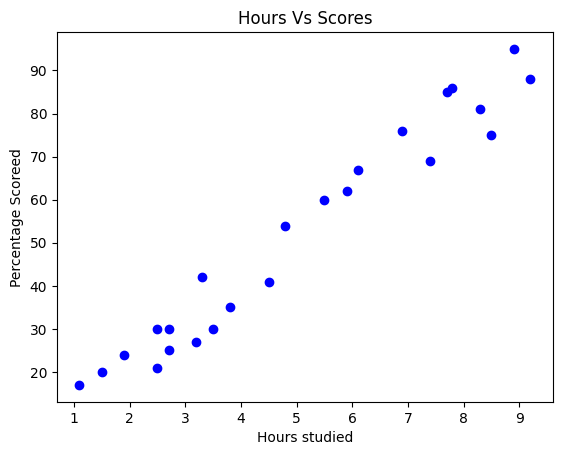

In [12]:
plt.scatter(df['Hours'], df['Scores'], color='Blue',marker='o')
plt.title("Hours Vs Scores")
plt.xlabel("Hours studied")
plt.ylabel("Percentage Scoreed")
plt.show()

In [13]:
df.corr()

,Hours,Scores
Hours,1.00000,0.97715
Scores,0.97715,1.00000


Text(0.5, 1.0, 'Plotting the regression line')

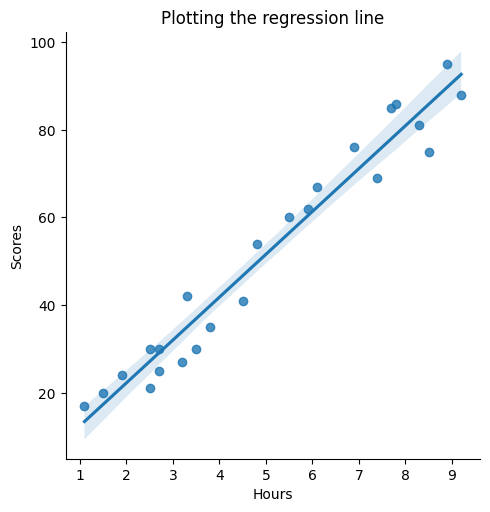

In [14]:
sns.lmplot(x="Hours",y="Scores", data=df)
plt.title("Plotting the regression line")

In [15]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [17]:
X

array([[2.5],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [19]:
y

array([21, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30, 24,
       67, 69, 30, 54, 35, 76, 86])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = regressor.predict(X_test)

In [23]:
y_pred

array([45.92654141, 58.87663403, 68.12670019, 86.6268325 , 48.70156126,
       33.90145541, 14.47631649, 76.45175972])

In [24]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,41,45.926541
1,62,58.876634
2,76,68.126700
3,95,86.626832
4,54,48.701561
5,27,33.901455
6,17,14.476316
7,86,76.451760


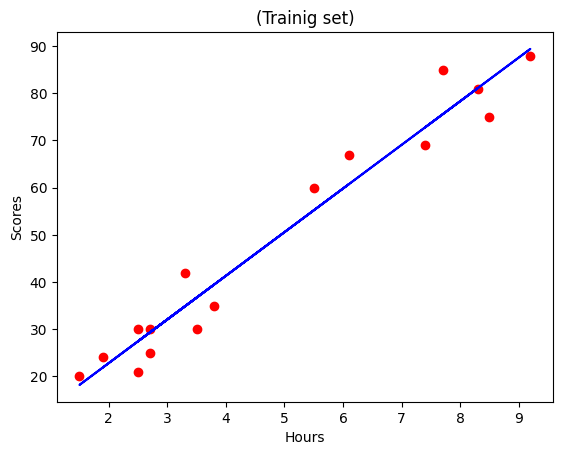

In [25]:
plt.scatter(X_train,y_train, color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('(Trainig set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

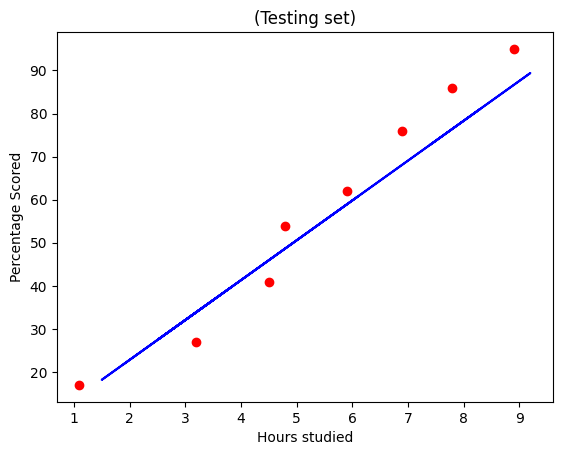

In [26]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('(Testing set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Scored')
plt.show()

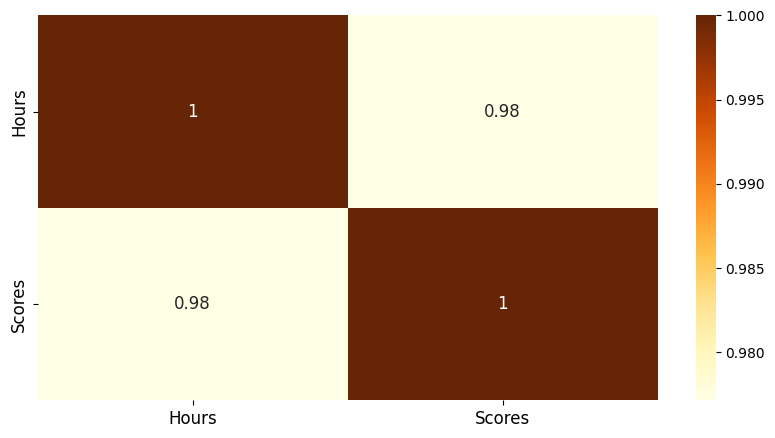

In [27]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap="YlOrBr",annot_kws={'fontsize':12})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

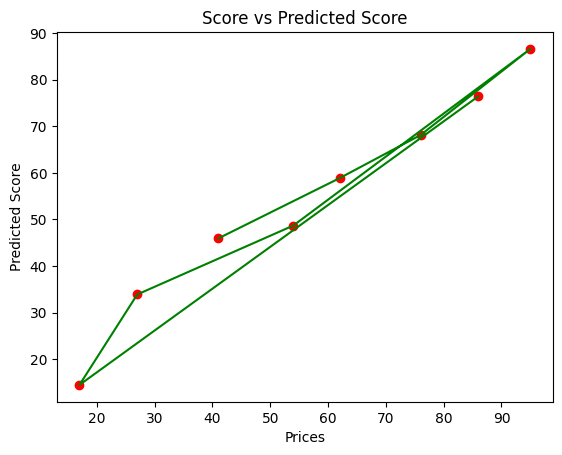

In [28]:
plt.scatter(y_test,y_pred,c='r')
plt.plot(y_test,y_pred,c='g')
plt.xlabel("Prices")
plt.ylabel("Predicted Score")
plt.title("Score vs Predicted Score")
plt.show()

In [29]:
Hours = np.array([[9.25]])
predict=regressor.predict(Hours)
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(predict[0]))

No of Hours = [[9.25]]
Predicted Score = 89.86435564964276


In [30]:
print("Train : ",regressor.score(X_train,y_train)*100)
print("Test : ",regressor.score(X_test,y_test)*100)

Train :  95.56878768912227
Test :  93.75648201590906


In [31]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('Mean absolute error:', metrics.mean_absolute_error(y_test, regressor.predict(X_test)))
print('r^2 score error:',r2_score(y_test, regressor.predict(X_test)))
print('Mean squared error: ',mean_squared_error(y_test, regressor.predict(X_test)))

Mean absolute error: 6.071024080444559
r^2 score error: 0.9375648201590906
Mean squared error:  42.420802503157866
